In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from collections import defaultdict
from scipy.stats import nbinom
from scipy.stats import norm

# Домашнее задание 1. Характеристики вероятностных распределений

## Задание 3. Описание способа моделирования выбранных случайных величин

### Для отрицательного биномиального распределения

Для моделирования выборок из отрицательного биномиального распределения, используя равномерно распределённые случайные величины на отрезке [0, 1], можно воспользоваться последовательностью испытаний Бернулли:

1. **Алгоритм**:
   1. На каждом шаге генерируется случайное число  U  из интервала [0, 1].
   2. Если $ U \leq p $, считаем испытание успешным, иначе — неудачным.
   3. Процесс повторяется, пока не будет достигнуто n  успехов, при этом учитываются все неудачи.
   4. Число неудач до достижения n  успехов добавляется в выборку.

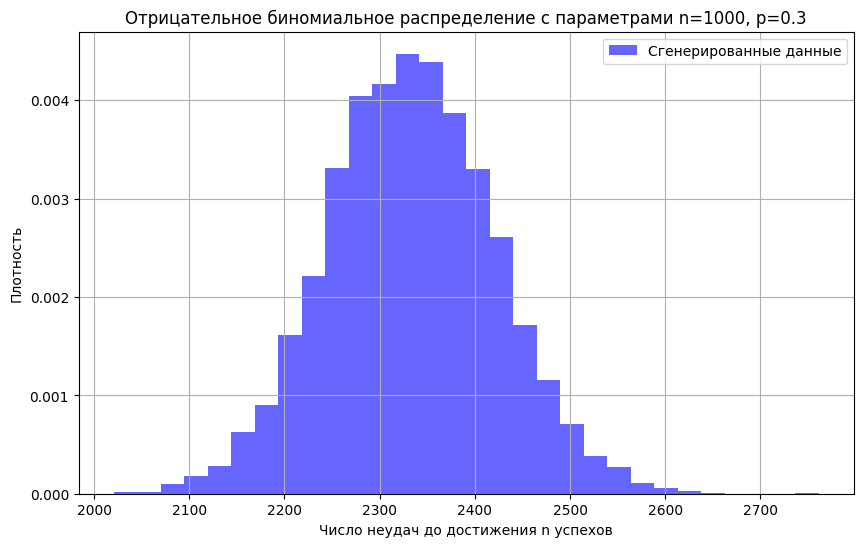

In [ ]:
import random
import matplotlib.pyplot as plt

# Функция для генерации выборки из отрицательного биномиального распределения
def generate_negative_binomial_sample(n, p, sample_size=1):
    samples = []  # Список для хранения сгенерированных значений
    for _ in range(sample_size):
        success_count = 0  # Счетчик успехов
        failure_count = 0  # Счетчик неудач
        # Проводим испытания до достижения n успехов
        while success_count < n:
            U = random.random()  # Генерируем случайное число U из равномерного распределения [0, 1]
            if U <= p:
                # Если U меньше или равно p, считаем это успехом
                success_count += 1
            else:
                # Иначе считаем это неудачей
                failure_count += 1
        # Добавляем количество неудач до достижения n успехов в выборку
        samples.append(failure_count)
    return samples

# Параметры распределения
n = 1000    # Число успехов, которое необходимо достичь
p = 0.3     # Вероятность успеха в каждом испытании
sample_size = 10000  # Размер выборки

# Генерируем выборку
sample = generate_negative_binomial_sample(n, p, sample_size)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=30, density=True, alpha=0.6, color='b', label='Сгенерированные данные')

# Настройка графика
plt.title(f'Отрицательное биномиальное распределение с параметрами n={n}, p={p}')
plt.xlabel('Число неудач до достижения n успехов')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()


### Для нормального распределения

Метод Бокса-Мюллера — это алгоритм, который позволяет преобразовать две независимые равномерно распределенные случайные величины  $U_1$  и  $U_2$  в две независимые случайные величины, распределенные нормально.

### Шаги метода:

1. **Генерация равномерных случайных величин**:  
   Сгенерируйте два случайных числа $U_1 $ и $ U_2 $, которые равномерно распределены на интервале [0, 1].

2. **Расчет нормальных случайных величин**:  
   Рассчитайте две независимые нормальные случайные величины $ Z_0 $ и $ Z_1 $ по формулам:
   
   $$
   Z_0 = \sqrt{-2 \ln U_1} \cdot \cos(2\pi U_2)
   $$
   
   $$
   Z_1 = \sqrt{-2 \ln U_1} \cdot \sin(2\pi U_2)
   $$

   Оба значения \( Z_0 \) и \( Z_1 \) будут независимо следовать стандартному нормальному распределению с параметрами $\mu$ = 0  и $ \sigma = 1 $.

3. **Преобразование для получения нормального распределения**:  
   Чтобы получить случайные величины с нормальным распределением с произвольными параметрами $ \mu $ и $ \theta $, воспользуйтесь следующим преобразованием:
   
   $$
   X = \mu + \theta \cdot Z
   $$
   
   где $ Z $ — это либо $ Z_0 $, либо $ Z_1 $ из предыдущего шага.

Таким образом, сгенерировав $ Z_0 $ и $ Z_1 $, вы можете создать два независимых нормально распределенных значения с заданными $ \mu $ и $ \theta $.


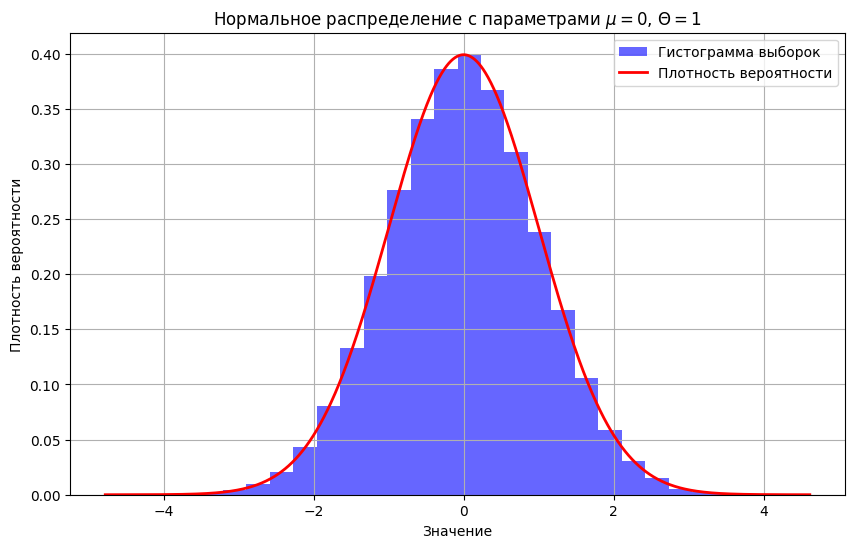

In [77]:
import math
import random
import matplotlib.pyplot as plt

def generate_normal_sample(mu, theta, sample_size=1):
    samples = []
    for _ in range(sample_size):
        # Генерируем два независимых равномерно распределенных случайных числа
        U1 = random.random()
        U2 = random.random()

        # Применяем метод Бокса-Мюллера для получения двух нормальных значений
        Z0 = math.sqrt(-2 * math.log(U1)) * math.cos(2 * math.pi * U2)
        Z1 = math.sqrt(-2 * math.log(U1)) * math.sin(2 * math.pi * U2)

        # Преобразуем в нормальные значения с параметрами mu и theta
        X0 = mu + theta * Z0
        X1 = mu + theta * Z1

        # Добавляем результаты в список выборок
        samples.extend([X0, X1])

    # Вернем только нужное количество значений (sample_size)
    return samples[:sample_size]

# Параметры распределения
mu = 0    # Среднее значение
theta = 1 # Стандартное отклонение
n = 100000    # Размер выборки

# Генерируем выборку
sample = generate_normal_sample(mu, theta, n)
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=30, density=True, alpha=0.6, color='b', label='Гистограмма выборок')

# Добавим график плотности
x = np.linspace(min(sample), max(sample), 1000)
pdf = (1 / (theta * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * theta ** 2))
plt.plot(x, pdf, 'r', linewidth=2, label='Плотность вероятности')
plt.title('Нормальное распределение с параметрами $\mu=0$, $\Theta=1$')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

функциб распеределения

In [ ]:
квантиль
матожидание
функцичя распределения
как считал интеграл

SyntaxError: invalid syntax (<ipython-input-29-ba86e0218b0a>, line 3)

# Домашнее задание 2. Основные понятия математической статистики

## Отрицательное биномиальное распределение

In [99]:
sample_sizes = [5, 10, 100, 200, 400, 600, 800, 1000]
m = 4
theta = 0.3

### 1. Генерация выборок выбранных случайных величин

In [100]:
samples = defaultdict(list)
for i in sample_sizes:
  for _ in range(5):
    samples[i].append(stats.nbinom.rvs(m, theta, size=i))
print(samples)

defaultdict(<class 'list'>, {5: [array([14, 13,  3,  4, 22]), array([19, 28,  5, 12,  5]), array([13,  7,  7, 24,  7]), array([ 4, 11, 13, 22, 12]), array([26, 10, 16, 17,  5])], 10: [array([14, 13,  7, 19,  5,  6,  8,  2,  3,  9]), array([10, 13, 12,  3,  5,  8, 12,  0,  7, 17]), array([11, 13,  0, 11,  7,  7, 19, 10, 12, 18]), array([12,  0, 10, 15, 13,  2, 13,  6, 11, 21]), array([10,  7,  3,  5, 12,  4, 13, 10,  4, 19])], 100: [array([14,  9, 12,  4,  9, 13, 11, 18,  8,  6,  5, 13,  9,  3,  6, 10,  9,
       20,  6, 11,  6,  8,  5, 17, 10, 25,  7,  3, 17, 11,  6,  6,  3,  8,
        1, 22, 12,  5,  8,  6, 13, 15,  4,  5,  3, 13,  4, 11,  4,  1,  5,
        1,  4,  7,  9,  5, 10, 14, 12, 15,  5, 10, 14,  6, 16,  7,  1,  1,
       15,  2,  7,  4, 10, 16, 11, 14,  5,  6, 14, 19,  2,  6,  5,  3,  6,
       13,  9, 19,  6, 12, 22,  7,  4,  7,  5, 12,  2,  1, 13, 14]), array([ 9,  5,  9,  5,  1, 20,  9,  7,  3,  6,  8, 10, 14,  5,  6, 13, 10,
        4,  1,  5, 15,  8,  9,  5, 14,  2, 16

### 2. Построение эмпирической функции распределения

In [ ]:
def EmpiricalCDF(sample: np.array):
  uniqueRv = np.array(sorted(set(sample)))
  cdf = map(lambda x: np.sum(sample < x)/len(sample), uniqueRv)
  return dict(zip(uniqueRv, cdf))

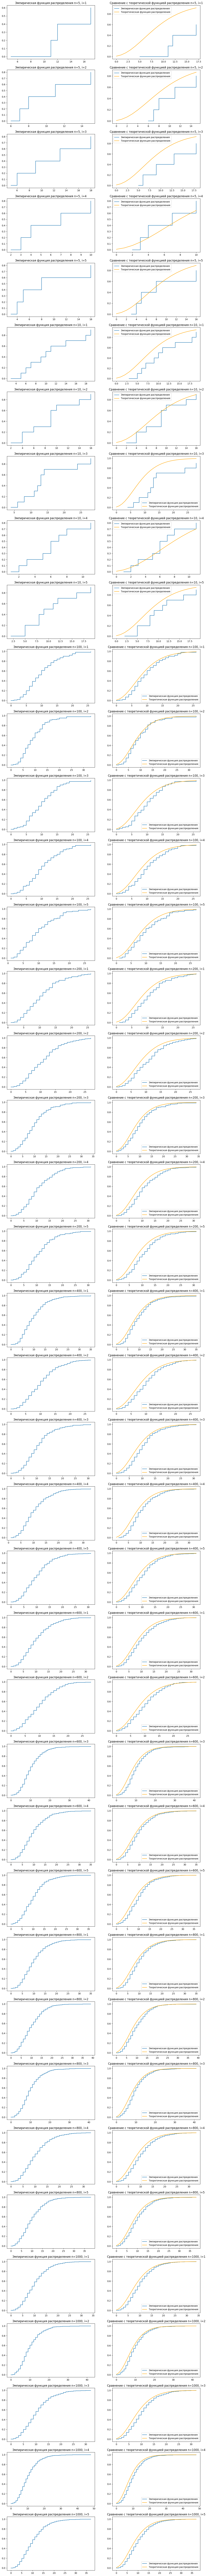

In [ ]:
plt.figure(figsize=(15, 5 * 8 * 5))
numberOfPlot = 1
for size in sample_sizes:
  for i in range(5):
    EmpCdf = EmpiricalCDF(samples[size][i])

    plt.subplot(5 * 8, 2, numberOfPlot)
    plt.step(EmpCdf.keys(), EmpCdf.values(), where='post', label='Эмпирическая функция распределения')
    plt.title(f'Эмпирическая функция распределения n={size}, i={i + 1}')
    numberOfPlot += 1

    x = np.arange(0, max(samples[size][i]) + 1)
    theoretical_cdf = nbinom.cdf(x, m, theta)
    plt.subplot(5 * 8, 2, numberOfPlot)
    plt.step(EmpCdf.keys(), EmpCdf.values(), where='post', label='Эмпирическая функция распределения')
    plt.plot(x, theoretical_cdf, label='Теоретическая функция распределения', color='orange')
    plt.title(f'Сравнение с теоретической функцией распределения n={size}, i={i + 1}')
    plt.legend()
    numberOfPlot += 1


plt.show()

In [ ]:
def calculate_D_mn(sample_n, sample_m):
    # Вычисляем эмпирические функции распределения
    F_n = EmpiricalCDF(sample_n)
    F_m = EmpiricalCDF(sample_m)

    # Объединяем все ключи (точки), чтобы покрыть оба распределения
    all_keys = sorted(set(F_n.keys()).union(set(F_m.keys())))

    # Приводим эмпирические функции распределения к общим точкам
    Fn_values = np.array([F_n.get(key, max(F_n.values())) for key in all_keys])
    Fm_values = np.array([F_m.get(key, max(F_m.values())) for key in all_keys])

    # Находим максимальное значение |F_n(x) - F_m(x)|
    max_diff = np.max(np.abs(Fn_values - Fm_values))

    # Размеры выборок
    n = len(sample_n)
    m = len(sample_m)

    # Вычисляем D_mn по формуле
    D_mn = np.sqrt((n * m) / (n + m)) * max_diff
    return D_mn



for i, n_size in enumerate(sample_sizes):
    for j, m_size in enumerate(sample_sizes[i+1:], i+1):
        for n_idx, n_sample in enumerate(samples[n_size]):
            for m_idx, m_sample in enumerate(samples[m_size]):
                D_mn = calculate_D_mn(n_sample, m_sample)
                print(f"D_{n_size},{m_size} для выборок {n_idx + 1} и {m_idx + 1} = {D_mn}")

D_5,10 для выборок 1 и 1 = 1.0954451150103321
D_5,10 для выборок 1 и 2 = 1.6431676725154984
D_5,10 для выборок 1 и 3 = 1.6431676725154984
D_5,10 для выборок 1 и 4 = 1.0954451150103324
D_5,10 для выборок 1 и 5 = 1.0954451150103321
D_5,10 для выборок 2 и 1 = 1.460593486680443
D_5,10 для выборок 2 и 2 = 1.460593486680443
D_5,10 для выборок 2 и 3 = 1.460593486680443
D_5,10 для выборок 2 и 4 = 1.460593486680443
D_5,10 для выборок 2 и 5 = 1.6431676725154984
D_5,10 для выборок 3 и 1 = 1.460593486680443
D_5,10 для выборок 3 и 2 = 1.6431676725154984
D_5,10 для выборок 3 и 3 = 1.6431676725154984
D_5,10 для выборок 3 и 4 = 1.460593486680443
D_5,10 для выборок 3 и 5 = 1.460593486680443
D_5,10 для выборок 4 и 1 = 1.6431676725154984
D_5,10 для выборок 4 и 2 = 1.2780193008453875
D_5,10 для выборок 4 и 3 = 1.6431676725154984
D_5,10 для выборок 4 и 4 = 1.460593486680443
D_5,10 для выборок 4 и 5 = 1.2780193008453875
D_5,10 для выборок 5 и 1 = 1.2780193008453875
D_5,10 для выборок 5 и 2 = 1.6431676725154

### 3. Построение гистограммы и полигона частот

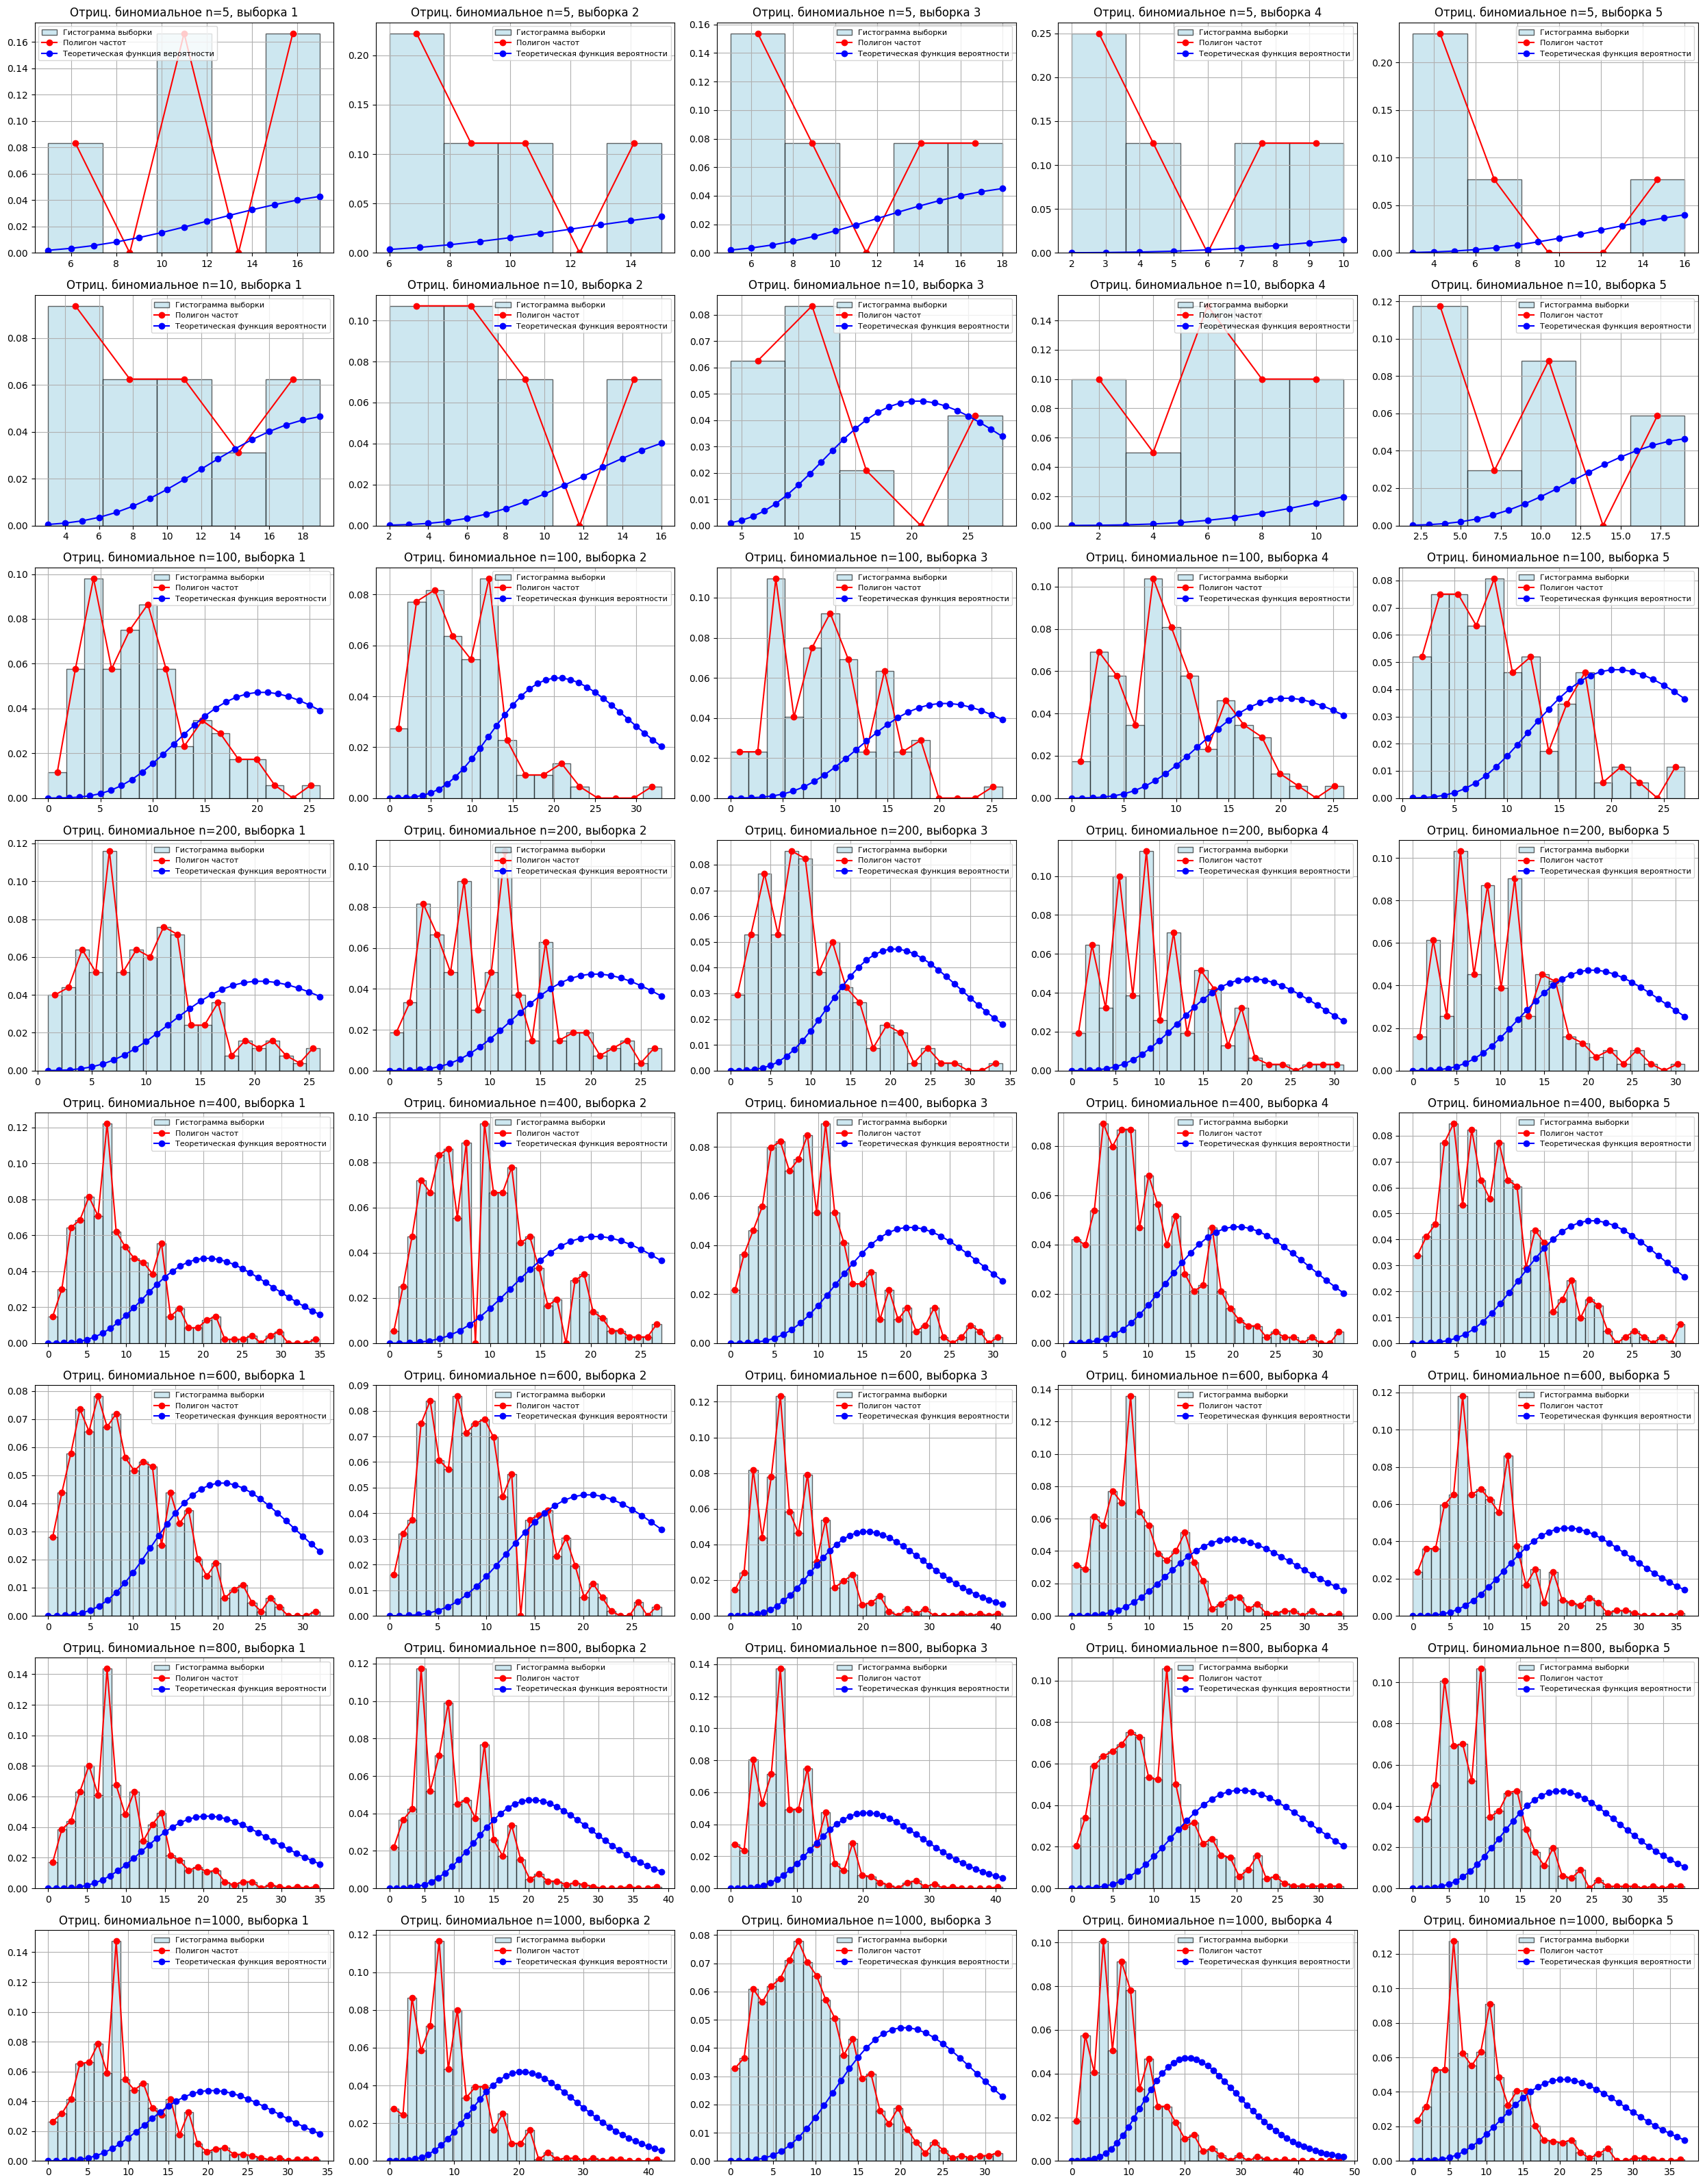

In [ ]:
binSize = {5: 5, 10: 5, 100: 15, 200: 20, 400: 30, 600: 30, 800: 30, 1000: 30}


plt.figure(figsize=(5 * 5, 8 * 4))
plotNum = 1
for size in sample_sizes:
    for i in range(5):
        sample = samples[size][i]

        # Построение подграфиков
        plt.subplot(8, 5, plotNum)

        # Гистограмма с частотами
        hist, binEdges, patches = plt.hist(sample, bins=binSize[size], density=True, edgecolor='black', alpha=0.6, color='lightblue', label='Гистограмма выборки')

        # Построение полигона частот
        midlePoints = (binEdges[:-1] + binEdges[1:]) / 2
        plt.plot(midlePoints, hist, marker='o', color='red', label='Полигон частот')

        # Теоретическая функция вероятности
        x = np.arange(min(sample), max(sample) + 1)
        theoretical_pmf = stats.nbinom.pmf(x, m, theta)
        plt.plot(x, theoretical_pmf, marker='o', color='blue', label='Теоретическая функция вероятности')

        # Настройки заголовка и осей
        plt.title(f'Отриц. биномиальное n={size}, выборка {i+1}')
        plt.grid(True)  # Добавление сетки
        plt.legend(fontsize=8)

        plotNum += 1

# Вывод графика
plt.tight_layout()
plt.show()

Связь с теоремами математической статистики:
Закон больших чисел:

Чем больше размер выборки, тем ближе эмпирическое распределение (гистограмма и полигон частот) будет к теоретическому распределению. Это иллюстрирует Закон больших чисел.
Центральная предельная теорема:

Если бы мы рассматривали суммы или средние значений выборок, то могли бы наблюдать приближение распределения к нормальному распределению с увеличением размера выборки, что иллюстрирует Центральную предельную теорему.

###4. Вычисление выборочных моментов

In [ ]:
true_mean = m * (1 - theta) / theta
true_variance = m * (1 - theta) / (theta ** 2)

for size in sample_sizes:
    for i in range(5):
        sample = samples[size][i]

        # Выборочное среднее
        sample_mean = np.mean(sample)

        # Выборочная дисперсия
        sample_variance = np.var(sample)  # для смещённой оценки, для несмещённой используйте ddof=1

        print(f"Размер выборки: {size}, Выборка {i+1}")
        print(f"Выборочное среднее: {sample_mean:.4f}")
        print(f"Выборочная дисперсия: {sample_variance:.4f}")
        print(f"Истинное математическое ожидание: {true_mean:.4f}")
        print(f"Истинная дисперсия: {true_variance:.4f}")
        print("\n")

Размер выборки: 5, Выборка 1
Выборочное среднее: 12.4000
Выборочная дисперсия: 19.8400
Истинное математическое ожидание: 23.3333
Истинная дисперсия: 77.7778


Размер выборки: 5, Выборка 2
Выборочное среднее: 9.4000
Выборочная дисперсия: 10.6400
Истинное математическое ожидание: 23.3333
Истинная дисперсия: 77.7778


Размер выборки: 5, Выборка 3
Выборочное среднее: 10.2000
Выборочная дисперсия: 22.9600
Истинное математическое ожидание: 23.3333
Истинная дисперсия: 77.7778


Размер выборки: 5, Выборка 4
Выборочное среднее: 5.2000
Выборочная дисперсия: 8.5600
Истинное математическое ожидание: 23.3333
Истинная дисперсия: 77.7778


Размер выборки: 5, Выборка 5
Выборочное среднее: 7.2000
Выборочная дисперсия: 22.1600
Истинное математическое ожидание: 23.3333
Истинная дисперсия: 77.7778


Размер выборки: 10, Выборка 1
Выборочное среднее: 10.2000
Выборочная дисперсия: 26.1600
Истинное математическое ожидание: 23.3333
Истинная дисперсия: 77.7778


Размер выборки: 10, Выборка 2
Выборочное среднее:

## Нормальное распределение

In [110]:
sample_sizes = [5, 10, 100, 200, 400, 600, 800, 1000]
theta = 7.0
mu = 20.5

### 1. Генерация выборок выбранных случайных величин

In [111]:
samples = defaultdict(list)
for i in sample_sizes:
  for _ in range(5):
    samples[i].append(np.array(generate_normal_sample(mu, theta, i)))
print(samples)

defaultdict(<class 'list'>, {5: [array([29.26601548, 21.55990603, 24.76084773, 16.86955049, 28.1628547 ]), array([26.15330781, 11.64228555, 35.20073307, 13.91111971, 15.72804309]), array([32.36400304, 36.45252405, 29.42485064, 25.97330471, 23.62743161]), array([29.21723375, 21.51189598, 20.82466434, 30.98478414, 16.83554458]), array([15.73277104, 18.81380898, 25.79239448,  2.29185916, 22.41670758])], 10: [array([13.78239242, 22.07349447, 19.60464333, 15.20981294, 18.3460258 ,
       11.80053092, 18.19409087, 19.8405012 , 21.81722991, 16.46130315]), array([17.33814854,  4.17529715, 33.61398947, 14.44632329,  4.13987581,
       27.86336361, 20.9927859 , 21.33508669, 13.62232544, 24.48052301]), array([12.02871846, 22.71897574, 25.88256768, 22.16001299, 20.88647756,
       16.52694495, 26.52710942, 31.61779618,  0.98065969, 12.67593824]), array([ 9.20246711, 20.01549758, 17.66180322, 16.676483  , 24.4294755 ,
       25.39061783, 28.37689325, 17.52863205, 28.74120601, 18.56553411]), array([

### 2. Построение эмпирической функции распределения

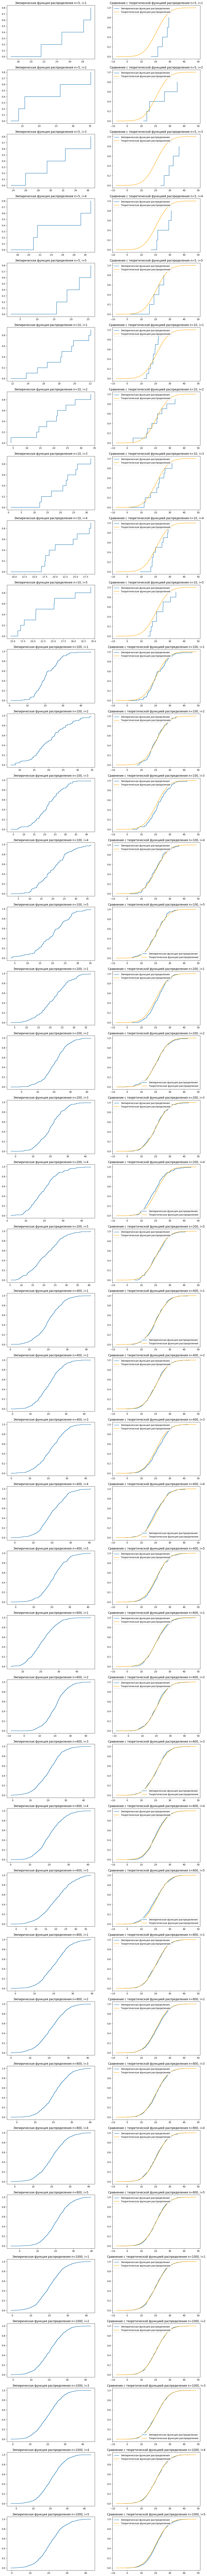

In [112]:
from scipy.special import erf

def EmpiricalCDF(sample: np.array):
  uniqueRv = np.array(sorted(set(sample)))
  cdf = map(lambda x: np.sum(sample < x)/len(sample), uniqueRv)
  return dict(zip(uniqueRv, cdf))

plt.figure(figsize=(15, 5 * 8 * 5))
numberOfPlot = 1
for size in sample_sizes:
  for i in range(5):
    EmpCdf = EmpiricalCDF(samples[size][i])

    plt.subplot(5 * 8, 2, numberOfPlot)
    plt.step(EmpCdf.keys(), EmpCdf.values(), where='post', label='Эмпирическая функция распределения')
    plt.title(f'Эмпирическая функция распределения n={size}, i={i + 1}')
    numberOfPlot += 1

    x_values = np.linspace(mu - 4*theta, mu + 4*theta, 1000)
    theoretical_cdf = norm.cdf(x_values, loc=mu, scale=theta)

    plt.subplot(5 * 8, 2, numberOfPlot)
    plt.step(EmpCdf.keys(), EmpCdf.values(), where='post', label='Эмпирическая функция распределения')
    plt.plot(x_values, theoretical_cdf, label='Теоретическая функция распределения', color='orange')
    plt.title(f'Сравнение с теоретической функцией распределения n={size}, i={i + 1}')
    plt.legend()
    numberOfPlot += 1


plt.show()

In [105]:
def calculate_D_mn(sample_n, sample_m):
    # Вычисляем эмпирические функции распределения
    F_n = EmpiricalCDF(sample_n)
    F_m = EmpiricalCDF(sample_m)

    # Объединяем все ключи (точки), чтобы покрыть оба распределения
    all_keys = sorted(set(F_n.keys()).union(set(F_m.keys())))

    # Приводим эмпирические функции распределения к общим точкам
    Fn_values = np.array([F_n.get(key, max(F_n.values())) for key in all_keys])
    Fm_values = np.array([F_m.get(key, max(F_m.values())) for key in all_keys])

    # Находим максимальное значение |F_n(x) - F_m(x)|
    max_diff = np.max(np.abs(Fn_values - Fm_values))

    # Размеры выборок
    n = len(sample_n)
    m = len(sample_m)

    # Вычисляем D_mn по формуле
    D_mn = np.sqrt((n * m) / (n + m)) * max_diff
    return D_mn



for i, n_size in enumerate(sample_sizes):
    for j, m_size in enumerate(sample_sizes[i+1:], i+1):
        for n_idx, n_sample in enumerate(samples[n_size]):
            for m_idx, m_sample in enumerate(samples[m_size]):
                D_mn = calculate_D_mn(n_sample, m_sample)
                print(f"D_{n_size},{m_size} для выборок {n_idx + 1} и {m_idx + 1} = {D_mn}")

D_5,10 для выборок 1 и 1 = 1.6431676725154984
D_5,10 для выборок 1 и 2 = 1.6431676725154984
D_5,10 для выборок 1 и 3 = 1.6431676725154984
D_5,10 для выборок 1 и 4 = 1.6431676725154984
D_5,10 для выборок 1 и 5 = 1.6431676725154984
D_5,10 для выборок 2 и 1 = 1.6431676725154984
D_5,10 для выборок 2 и 2 = 1.6431676725154984
D_5,10 для выборок 2 и 3 = 1.6431676725154984
D_5,10 для выборок 2 и 4 = 1.6431676725154984
D_5,10 для выборок 2 и 5 = 1.6431676725154984
D_5,10 для выборок 3 и 1 = 1.6431676725154984
D_5,10 для выборок 3 и 2 = 1.6431676725154984
D_5,10 для выборок 3 и 3 = 1.6431676725154984
D_5,10 для выборок 3 и 4 = 1.6431676725154984
D_5,10 для выборок 3 и 5 = 1.6431676725154984
D_5,10 для выборок 4 и 1 = 1.6431676725154984
D_5,10 для выборок 4 и 2 = 1.6431676725154984
D_5,10 для выборок 4 и 3 = 1.6431676725154984
D_5,10 для выборок 4 и 4 = 1.6431676725154984
D_5,10 для выборок 4 и 5 = 1.6431676725154984
D_5,10 для выборок 5 и 1 = 1.6431676725154984
D_5,10 для выборок 5 и 2 = 1.64316

### 3. Построение гистограммы и полигона частот

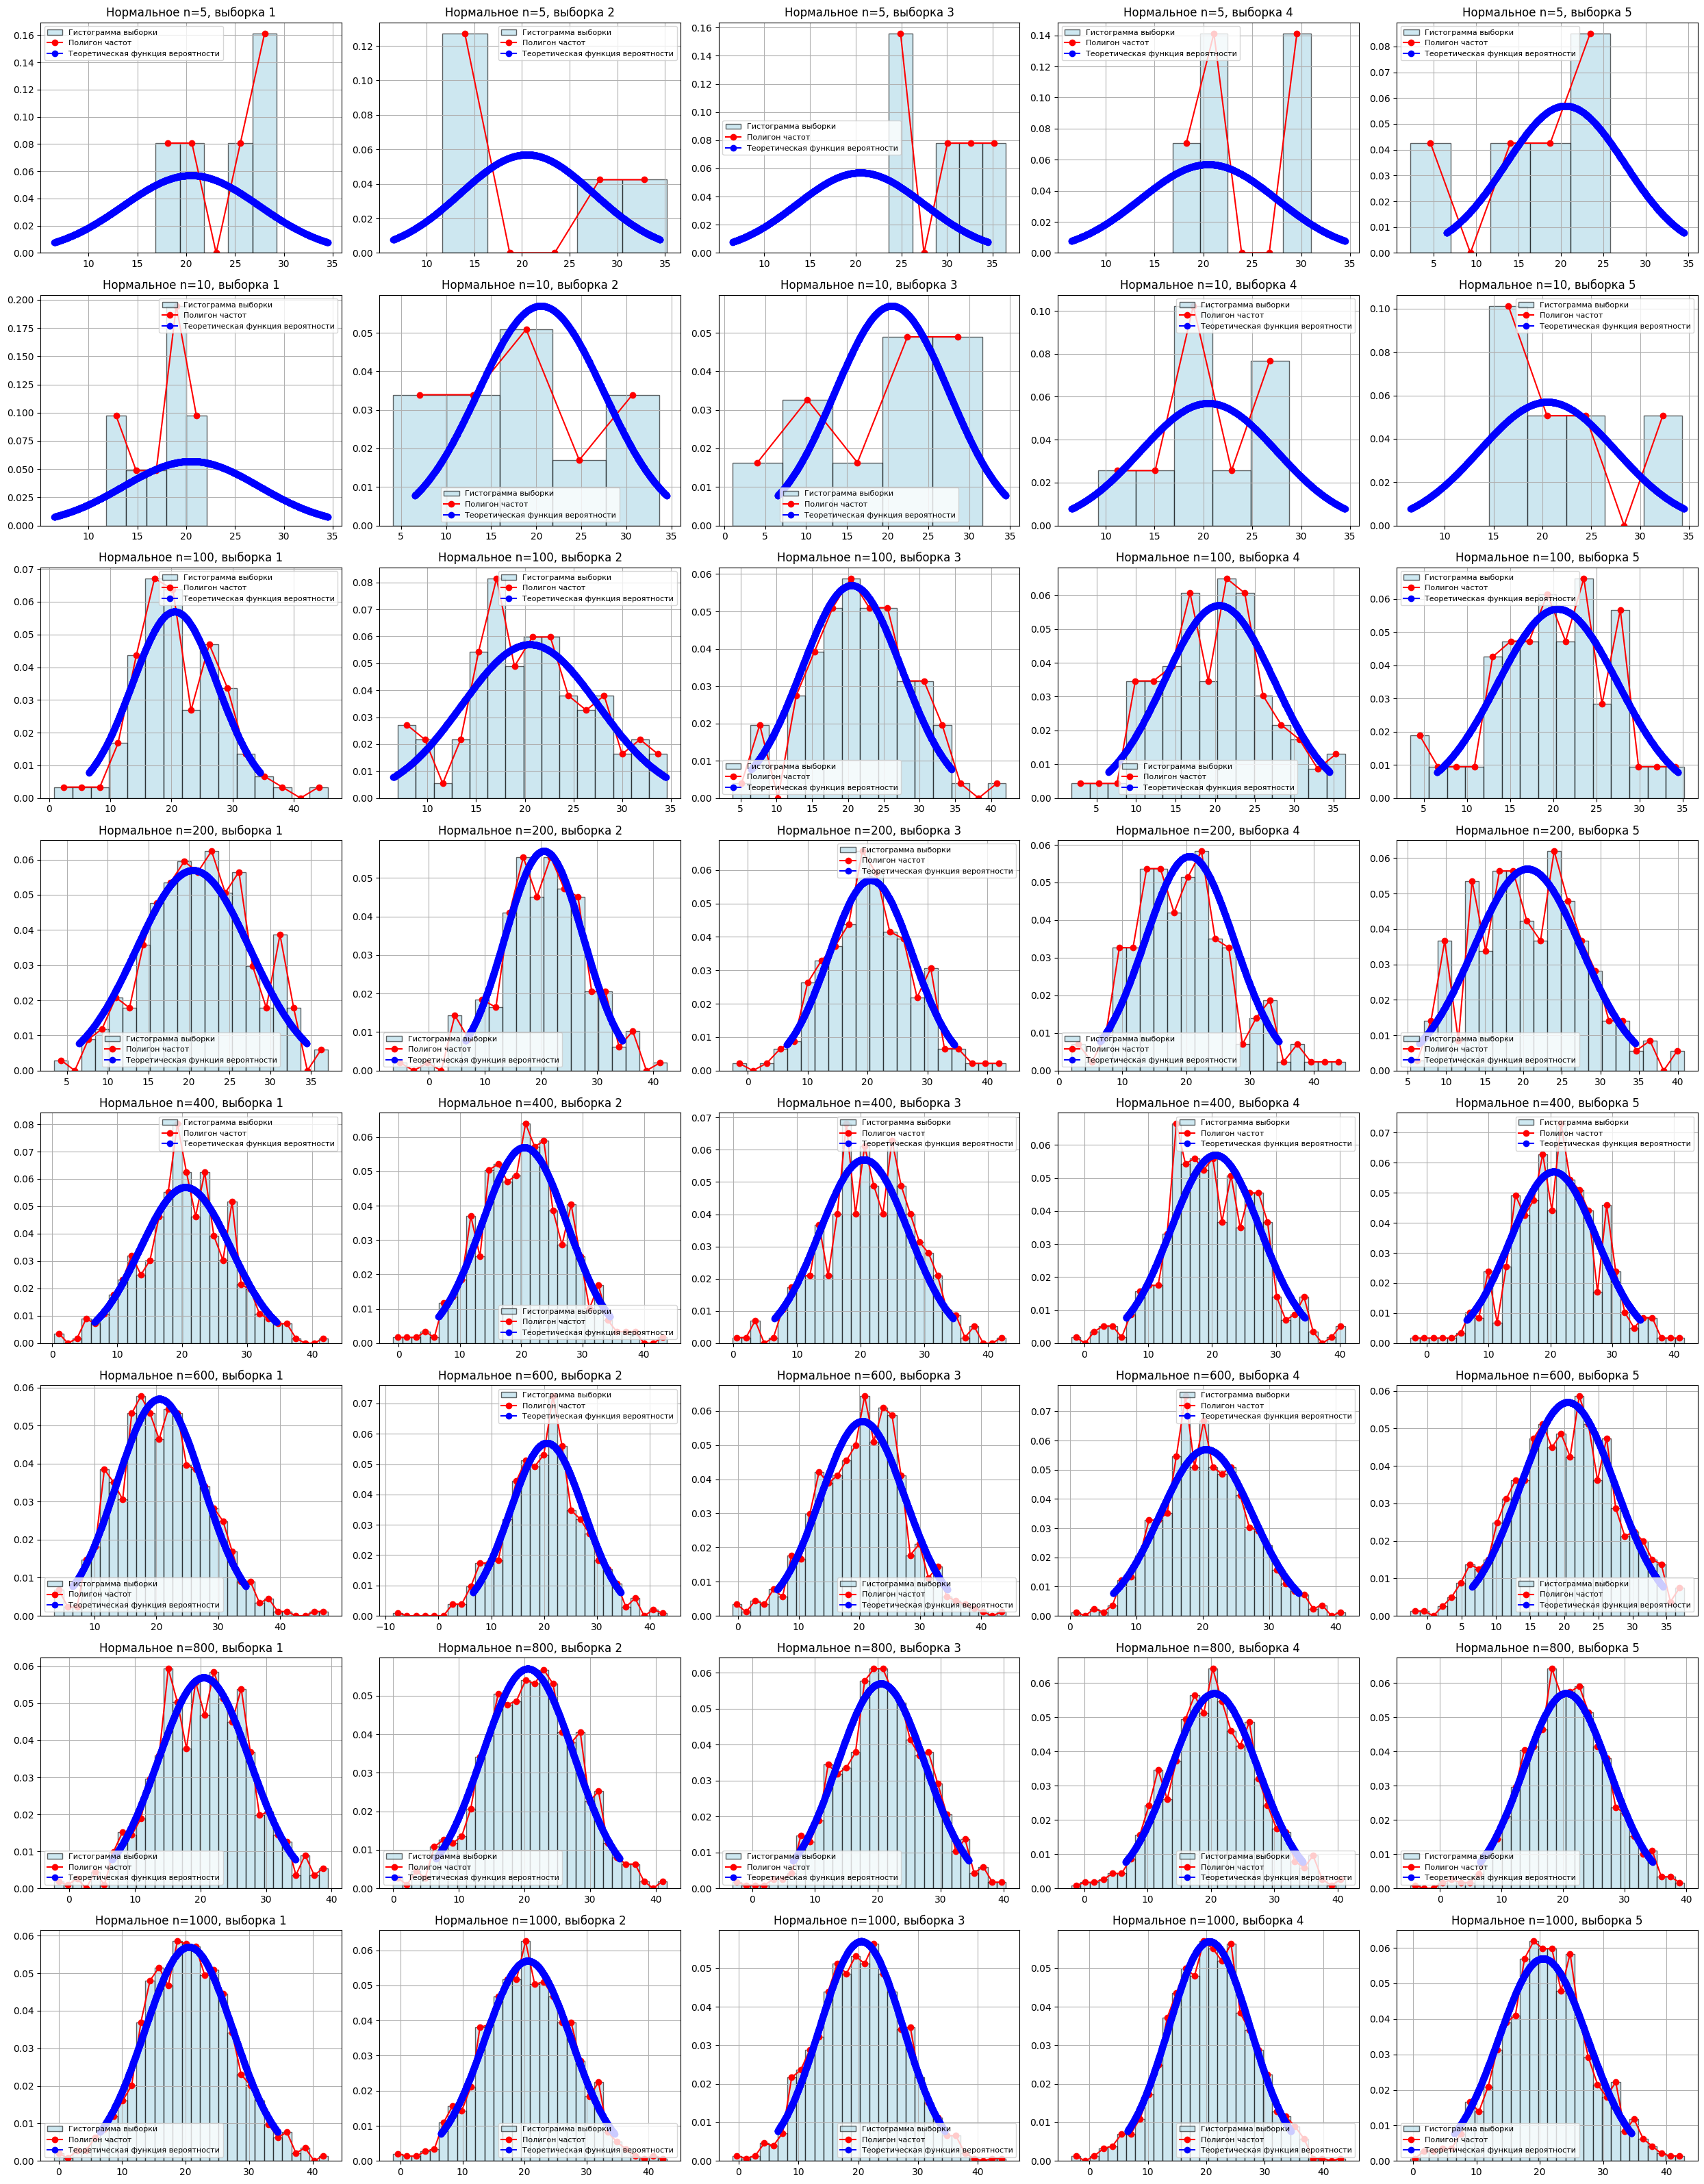

In [115]:
binSize = {5: 5, 10: 5, 100: 15, 200: 20, 400: 30, 600: 30, 800: 30, 1000: 30}


plt.figure(figsize=(5 * 5, 8 * 4))
plotNum = 1
for size in sample_sizes:
    for i in range(5):
        sample = samples[size][i]

        # Построение подграфиков
        plt.subplot(8, 5, plotNum)

        # Гистограмма с частотами
        hist, binEdges, patches = plt.hist(sample, bins=binSize[size], density=True, edgecolor='black', alpha=0.6, color='lightblue', label='Гистограмма выборки')

        # Построение полигона частот
        midlePoints = (binEdges[:-1] + binEdges[1:]) / 2
        plt.plot(midlePoints, hist, marker='o', color='red', label='Полигон частот')

        # Теоретическая функция вероятности
        x = np.linspace(mu - 2*theta, mu + 2*theta, 1000)
        theoretical_pmf = stats.norm.pdf(x, mu, theta)
        plt.plot(x, theoretical_pmf, marker='o', color='blue', label='Теоретическая функция вероятности')

        # Настройки заголовка и осей
        plt.title(f'Нормальное n={size}, выборка {i+1}')
        plt.grid(True)  # Добавление сетки
        plt.legend(fontsize=8)

        plotNum += 1

# Вывод графика
plt.tight_layout()
plt.show()

### 4. Вычисление выборочных моментов

In [116]:
true_mean = mu
true_variance = theta ** 2

for size in sample_sizes:
    for i in range(5):
        sample = samples[size][i]

        # Выборочное среднее
        sample_mean = np.mean(sample)

        # Выборочная дисперсия
        sample_variance = np.var(sample)  # для смещённой оценки, для несмещённой используйте ddof=1

        print(f"Размер выборки: {size}, Выборка {i+1}")
        print(f"Выборочное среднее: {sample_mean:.4f}")
        print(f"Выборочная дисперсия: {sample_variance:.4f}")
        print(f"Истинное математическое ожидание: {true_mean:.4f}")
        print(f"Истинная дисперсия: {true_variance:.4f}")
        print("\n")

Размер выборки: 5, Выборка 1
Выборочное среднее: 24.1238
Выборочная дисперсия: 20.4720
Истинное математическое ожидание: 20.5000
Истинная дисперсия: 49.0000


Размер выборки: 5, Выборка 2
Выборочное среднее: 20.5271
Выборочная дисперсия: 78.5424
Истинное математическое ожидание: 20.5000
Истинная дисперсия: 49.0000


Размер выборки: 5, Выборка 3
Выборочное среднее: 29.5684
Выборочная дисперсия: 20.6894
Истинное математическое ожидание: 20.5000
Истинная дисперсия: 49.0000


Размер выборки: 5, Выборка 4
Выборочное среднее: 23.8748
Выборочная дисперсия: 28.7062
Истинное математическое ожидание: 20.5000
Истинная дисперсия: 49.0000


Размер выборки: 5, Выборка 5
Выборочное среднее: 17.0095
Выборочная дисперсия: 65.5743
Истинное математическое ожидание: 20.5000
Истинная дисперсия: 49.0000


Размер выборки: 10, Выборка 1
Выборочное среднее: 17.7130
Выборочная дисперсия: 10.2835
Истинное математическое ожидание: 20.5000
Истинная дисперсия: 49.0000


Размер выборки: 10, Выборка 2
Выборочное сред